<h1>Modelling the impact of international border restrictions on the Australian unemployment rate </h1>

## Introduction

To limit the spread of Covid-19 the Australian government mandated strict border restrictions which effectively barred all non-citizens and non-residents from entry into the country from 20 March 2020. As a result, demand for good and services from industries reliant on a steady stream of international arrivals plummeted causing a deterioration in the Australian unemployment rate. As such, this project first seeks to provide an exploratory analysis of border restrictions and its implications across Australian industries. Second, using linear regression, model the Australian unemployment rate. Finally, predict and assess the impact of border restrictions on the unemployment rate over 2020 by simulating varying levels of international arrivals.

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import datetime
import matplotlib.dates as mdates
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
from datetime import timedelta, datetime
from scipy.stats import pearsonr
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
sns.set()
plt.style.use('seaborn')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## Datasets

In [2]:
covid_df = pd.read_excel('Data sets/Monthly Covid-19 cases.xlsx')
arrivals_df = pd.read_excel('Data sets/Monthly International arrivals by state of clearance.xlsx')
cash_rate_df = pd.read_excel('Data sets/Monthly RBA cash rate.xlsx')
unemployment_df = pd.read_excel('Data sets/Monthly Unemployment rate.xlsx')
job_vacancies_df = pd.read_excel('Data sets/Monthly job vacancies.xlsx')
Consumption_expenditure_df = pd.read_excel('Data sets/Monthly Consumption expenditure.xlsx')
government_expenditure_df = pd.read_excel('Data sets/Monthly Government expenditure.xlsx')
balancepayments_df = pd.read_excel ('Data sets/Monthly balance of goods and services.xlsx',index_col='Date', parse_dates=True)

## Dataset descriptions

- covid_df - Number of Monthly Covid-19 Cases at National and state level sourced from the Department of Health (http://www9.health.gov.au/cda/source/rpt_1.cfm).
- arrivals_df - Number of monthly international arrivals to Australia sourced from the Australian bureau of statistics (https://www.abs.gov.au/statistics/industry/tourism-and-transport/overseas-travel-statistics-provisional).
- cash_rate_df - Monthly Cash Rate sourced from the Reserve Bank of Australia. (https://www.rba.gov.au/statistics/cash-rate/)
- unemployment_df - Monthly national unemployment rate sourced from the Australian bureau of statistics (https://www.abs.gov.au/statistics/economy/key-indicators)
- job_vacancies_df - Number of monthly Job Vacancies by industry and state sourced from the Australian labour Market Information Portal (https://lmip.gov.au/default.aspx?LMIP/GainInsights/VacancyReport).
- government_expenditure_df = Monthly government expenditure sourced from monthly Commonwealth financial statements (https://www.finance.gov.au/publications/commonwealth-monthly-financial-statements).
- balancepayments_df - Monthly balance of goods and services which records the value of exported goods and services and the value of imported goods and services sourced from the Australian bureau of statistics (https://www.abs.gov.au/statistics/economy/international-trade/international-trade-goods-and-services-australia).

## Covid-19 and the Australian unemployment rate

In [3]:
# Merge covid and unemployment df and clean data
unemployment_df = unemployment_df[['Date','Unemployment rate Australia']]
unemployment_df.set_index('Date', inplace= True )
covid_df.set_index('Date', inplace= True )
Covid_unemployment = pd.merge(unemployment_df, covid_df, how = 'outer' , on='Date' )
Covid_unemployment = Covid_unemployment[['Unemployment rate Australia','AUS']]
Covid_unemployment = Covid_unemployment.loc['2016-01-01':]
Covid_unemployment.index = pd.to_datetime(Covid_unemployment.index)
Covid_unemployment.columns=['Unemployment rate Australia','Covid-19 cases']

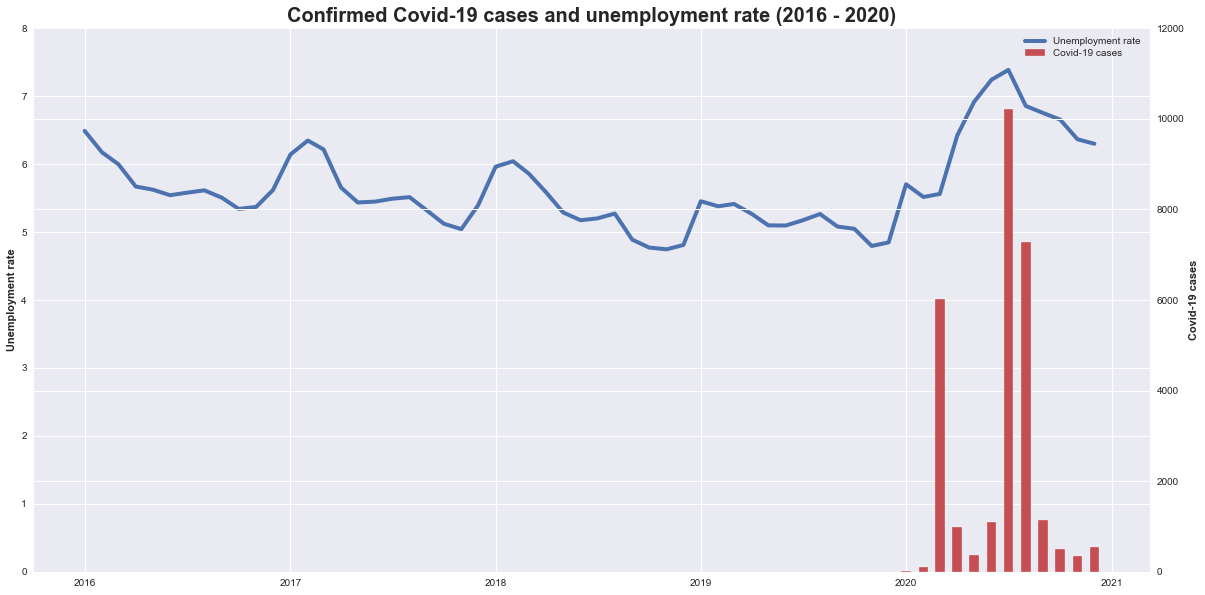

In [4]:
# Plot unemployment rate
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(Covid_unemployment['Unemployment rate Australia'].loc['Jan-2016':], color= 'b',linewidth=4, zorder=1)
plt.title('Confirmed Covid-19 cases and unemployment rate (2016 - 2020)', fontsize=20,weight='bold')
ax.set_ylabel('Unemployment rate',weight='bold')
ax.legend(['Unemployment rate'])
plt.ylim(0, 8)
# Plot confirmed Covid-19 cases
ax2 = ax.twinx()
ax2.set_ylabel('Covid-19 cases',weight='bold')
ax2.bar(Covid_unemployment.index, Covid_unemployment['Covid-19 cases'], width=17, color= 'r',zorder=100)
ax2.legend(['Covid-19 cases'],bbox_to_anchor=(0.983, 0.978))
ax2.tick_params(axis='y')
plt.ylim(0, 12000)
plt.show()

From 2016 until the outbreak of Covid-19 in January 2020 the unemployment rate displays two principal trends. The first is that the unemployment rate is largely trending downwards, going from a peak of 6.5% in 2016 to 4.75% in 2019. The second trend is that from year to year the unemployment rate follows an annual cycle whereby it falls from a peak at the beginning, reaches a valley in the middle before peaking again at a lower point at the start of the following year. This trend highly suggests that the unemployment rate during this period followed a typical business cycle. From 2020 onwards however unemployment sharply rises as Covid-19 begins to spread within the country, with the height of unemployment coinciding with the peak of confirmed Covid-19 cases. A modest recovery in the unemployment rate is observed for the remainder of 2020 as confirmed cases sharply decline from its peak.

## Limiting the contagion - international border restrictions

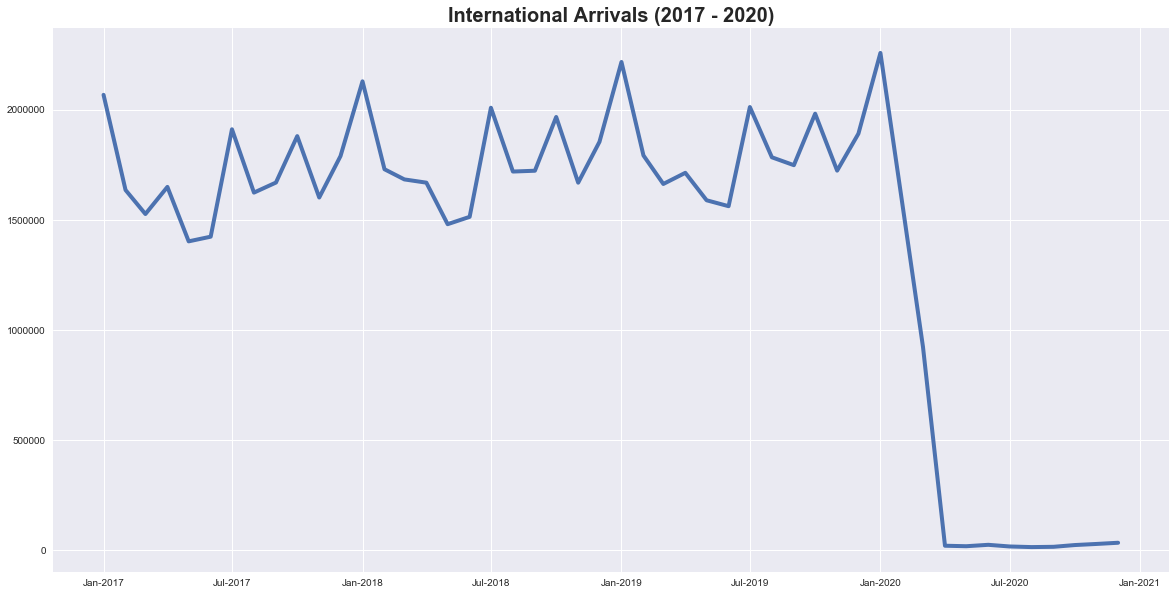

In [5]:
# Plot internation arrivals
arrivals_df.set_index('Date', inplace= True )
arrivals_df = arrivals_df[['Australia']]
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(arrivals_df['Australia'].loc['Jan-2017':], color= 'b',linewidth=4)
plt.title('International Arrivals (2017 - 2020)', fontsize=20,weight='bold')
date_format = mpl_dates.DateFormatter('%b-%Y')
plt.gca().xaxis.set_major_formatter(date_format)
Aplt.show()

International arrivals from 2017 until the border closures are highly seasonal in nature with peak arrivals typically occuring during the holiday period at the end of the year. International arrivals plummet to near zero from March 2020 onwards with imposition of border restrictions.

## Relationship between job creation and international arrivals

In [6]:
# Merge job vacancies arrivals and clean data
job_vacancies_df.set_index('Date', inplace= True )
arr_jobs_df = pd.merge(job_vacancies_df, arrivals_df, on = 'Date', how = 'inner')
# Correlation co-efficient
corr, _ = pearsonr(arr_jobs_df['Total jobs'], arr_jobs_df['Australia'])
corr = round(corr, 1)

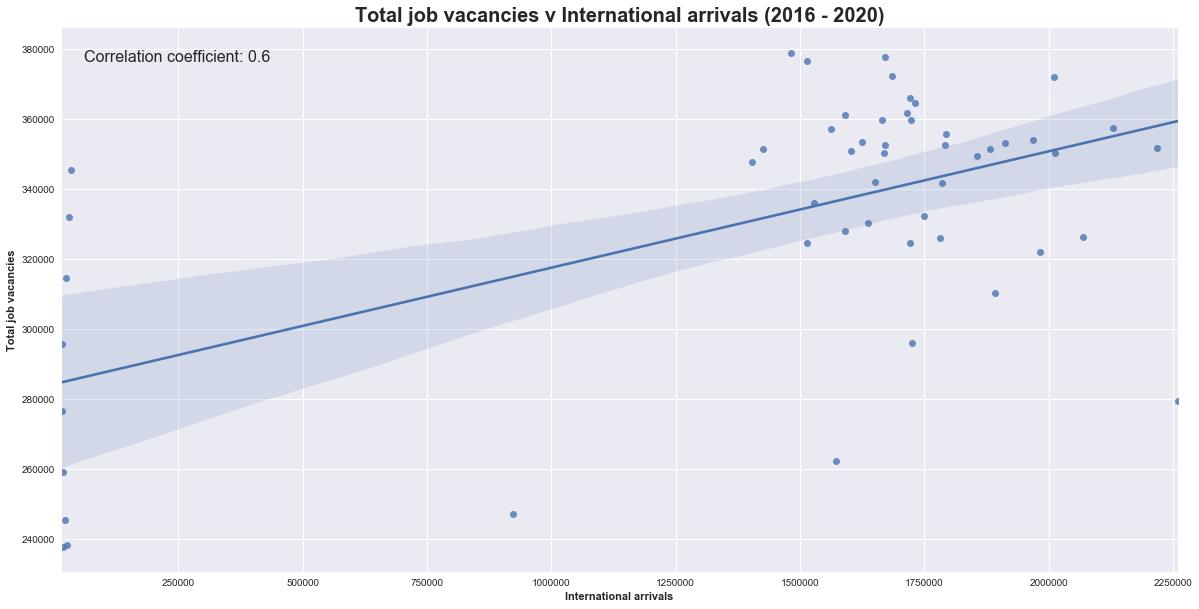

In [7]:
# Scatterplot arrivals & job vacancies 
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
g = sns.regplot(x=arr_jobs_df['Australia'], y=arr_jobs_df['Total jobs'])
ax.text(0.02, 0.96, "Correlation coefficient: 0.6", ha="left", va="top", transform=ax.transAxes,fontsize=16)
ax.set_ylabel('Total job vacancies',weight='bold')
ax.set_xlabel('International arrivals',weight='bold')
plt.title('Total job vacancies v International arrivals (2016 - 2020)', fontsize=20,weight='bold')
plt.show()

Despite a relatively large cluster towards the top right of the plot, the relationship between international arrivals and job vacancies is moderately positive (r =  0.6) as a cluster with low international arrivals and high job vacancies is observed. This indicates that in the face of continued border closures a significant recovery in jobs occured over 2020.

## Impact on industry

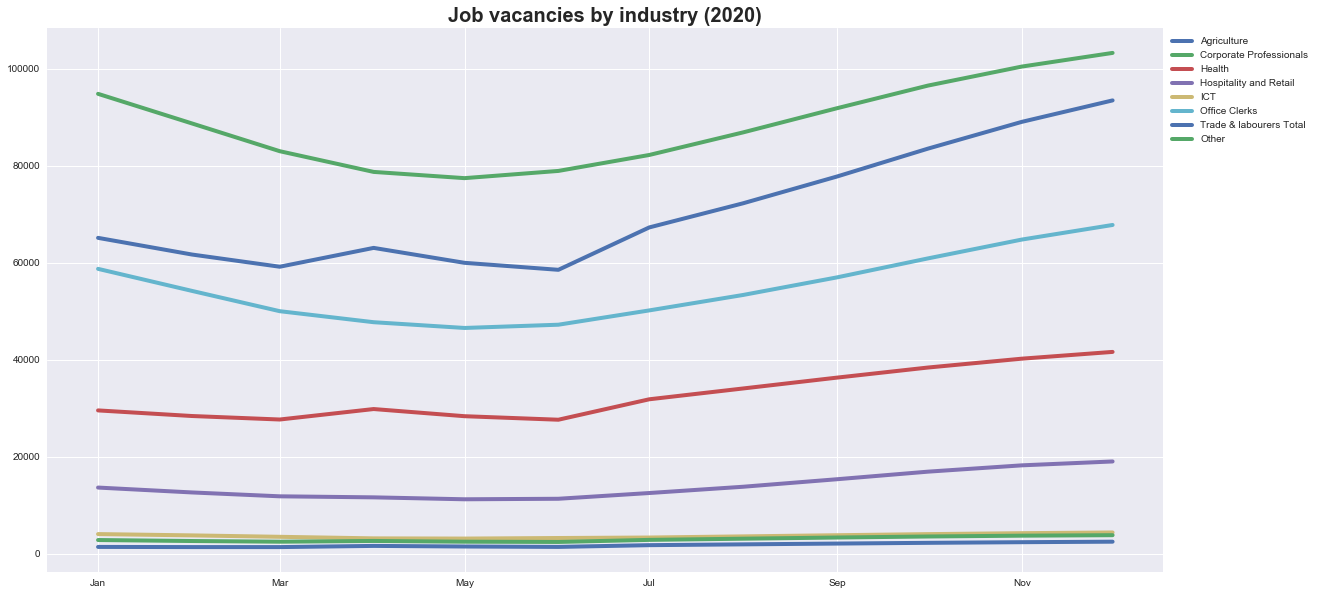

In [8]:
# Plot job vacancies by industry
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(job_vacancies_df[['Agriculture Total', 'Corporate Professionals Total',
       'Health Total', 'Hospitality and Retail Total', 'ICT Total',
       'Office Clerks Total', 'Trade, construction and laborers Total','Other Total']].loc['Jan-2020':],linewidth=4, zorder = 2)
ax.legend(['Agriculture', 'Corporate Professionals',
       'Health', 'Hospitality and Retail', 'ICT',
       'Office Clerks', 'Trade & labourers Total', 'Other'], bbox_to_anchor=(1, 1))
plt.title('Job vacancies by industry (2020)', fontsize=20,weight='bold')
date_format = mpl_dates.DateFormatter('%b')
plt.gca().xaxis.set_major_formatter(date_format)
plt.show()

Job vacancies for corporate professionals, trade and labourers, office clerks, hospitality and retail workers all declined with the height of the Covid-19 pandemic during the March - July period before before recovering and exceeded pre covid-19 levels of job vacancies heading into 2021. Job vacancies for health workers saw minor fluctuations over the height of the pandemic but also increased for the remainder for 2020, while ICT, agriculture and other remained steady over 2020.

## Modelling the Australian unemployment rate

In [9]:
# Function to set date index to month-year format
def setDateIndexMonthYear(df):
    df.reset_index(drop=False, inplace=True)
    df['Date'] = df['Date'].dt.strftime("%b-%Y")
    df.set_index('Date', inplace= True )
    return df

format_date = [unemployment_df,government_expenditure_df,cash_rate_df,Consumption_expenditure_df, job_vacancies_df, arrivals_df, balancepayments_df]
for df in format_date:
    setDateIndexMonthYear(df)

In [18]:
datasets_models = [government_expenditure_df,cash_rate_df,Consumption_expenditure_df, job_vacancies_df, arrivals_df, balancepayments_df]
unemployment_rate_model = unemployment_df.copy()
# Merge all datasets to create linear regression model for Australian unemployment
# Model contains data for 2019 - 2020 to prevent data imbalance
for df in datasets_models:
    unemployment_rate_model = pd.merge(unemployment_rate_model,df, on ='Date', how = 'inner' )
unemployment_rate_model = unemployment_rate_model[['Government expenditure','Unemployment rate Australia','Cash Rate Target','Consumption expenditure','Total jobs','Australia','Balance on goods and services']]
unemployment_rate_model.columns=['Government expenditure','Unemployment rate Australia','Cash Rate Target','Consumption expenditure','Total jobs','Total arrivals','Balance on goods and services']
unemployment_rate_model = unemployment_rate_model.loc['Jan-2019':]
unemployment_rate_model

,Government expenditure,Unemployment rate Australia,Cash Rate Target,Consumption expenditure,Total jobs,Total arrivals,Balance on goods and services
Date,,,,,,,
Jan-2019,42952,5.453186,1.50,26748.0,351777.094,2217820,2367.0
Feb-2019,36922,5.379208,1.50,24049.2,355710.709,1793390,6359.0
Mar-2019,38902,5.413659,1.50,26660.6,359759.198,1663990,7586.0
Apr-2019,39433,5.269977,1.50,25937.2,361913.304,1714550,4876.0
May-2019,40251,5.098930,1.50,26708.0,361167.899,1589960,5726.0
Jun-2019,39842,5.095868,1.28,26311.9,357146.805,1563090,8606.0
Jul-2019,46894,5.172085,1.02,26602.4,350442.773,2013180,7182.0
Aug-2019,39564,5.265908,1.00,27104.8,341934.087,1785080,7162.0
Sep-2019,39353,5.080975,1.00,26583.6,332504.144,1749270,4219.0


#### Split data for training and testing model

In [11]:
X = unemployment_rate_model.drop(columns = ['Unemployment rate Australia'])
y = unemployment_rate_model["Unemployment rate Australia"]
# allocate 80% of data to training model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

#### linear regression model

In [12]:
# Instantiate linear regression model
linear_model = LinearRegression()
# Train linear model
linear_model.fit(X_train, y_train)
# Prediction for baseline model test set
y_hat_test_linear = linear_model.predict(X_test)
# Assess model
R2_linear = r2_score(y_test, y_hat_test_linear)
print("R^2: ", R2_linear)

R2:  0.7492467799785292


The R^2 of the model is 0.75 indicating that the model fits the data reasonably well.

## Model tuning -  Feature importance using recursive feature elimination

In [13]:
from sklearn.feature_selection import RFE
estimator = LinearRegression()
rmse_scores = []
for i in range(1,7):
    selector = RFE(linear_model, n_features_to_select=i, step=1)
    selector = selector.fit(X_train, y_train)
    y_hat_test = selector.predict(X_test)
    rmse_test = np.sqrt(mean_squared_error(y_test, y_hat_test))
    print("RMSE score on test set using", i, "features: ", rmse_test)
    rmse_scores.append(rmse_test)

RMSE score on test set using 1 features:  0.5887254067026001
RMSE score on test set using 2 features:  0.6766752030395099
RMSE score on test set using 3 features:  0.7414089037878491
RMSE score on test set using 4 features:  0.6295907070272226
RMSE score on test set using 5 features:  0.6524539237116024
RMSE score on test set using 6 features:  0.4280496833005595


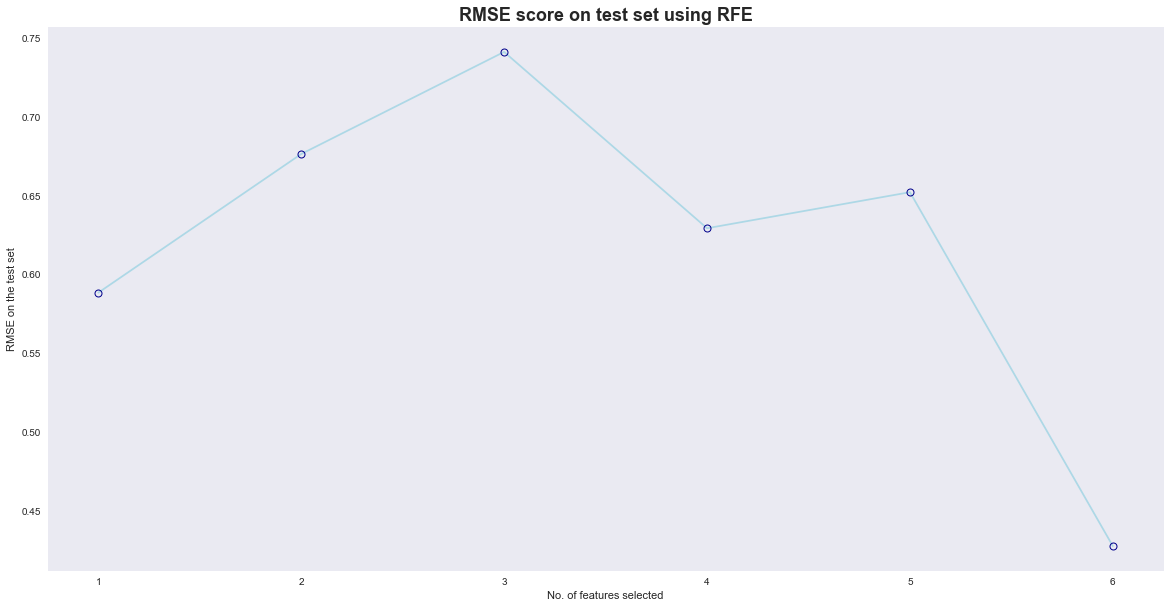

In [14]:
plt.figure(figsize=(20,10))
plt.grid()   
plt.xlabel('No. of features selected')
plt.ylabel('RMSE on the test set')
plt.title('RMSE score on test set using RFE', fontsize=18, fontweight='bold')
plt.plot(range(1, 7), rmse_scores, marker = 'o', color = 'lightblue', markeredgewidth = 1 ,markeredgecolor = 'DarkBlue', markerfacecolor = 'None')
plt.show()

The lowest root mean squared error (RMSE) of 0.43 is achieved with 6 features indicating that including all the variables is the optimal fit for model.

## Simulating varying levels of border restrictions

#### Scenario 1 - Limited border restrictions (half the number of arrivals for same month in the previous year)

In [15]:
half_arrivals = unemployment_rate_model['Total arrivals'].loc['Jan-2019':'Nov-2019']
for row in range(len(half_arrivals)):
    half_arrivals.iloc[row] = half_arrivals.iloc[row]/2
unemployment_rate_model_scen1 = unemployment_rate_model.copy()
for row in range(len(unemployment_rate_model_scen1['Total arrivals'].loc['Jan-2020':'Nov-2020'])):
    unemployment_rate_model_scen1['Total arrivals'].iloc[row + 12] = half_arrivals[row]
y_hat_test_linear_1 = linear_model.predict(unemployment_rate_model_scen1.drop(['Unemployment rate Australia'], axis = 1))
unemployment_rate_model_scen1['y^ unemployment 1'] = y_hat_test_linear_1
unemployment_rate_model_scen1.tail()

#### Scenario 2 - No border restrictions (same number of arrivals for each month in the previous year)

In [16]:
full_arrivals = unemployment_rate_model['Total arrivals'].loc['Jan-2019':'Nov-2019']
unemployment_rate_model_scen2 = unemployment_rate_model.copy()
for row in range(len(unemployment_rate_model_scen2['Total arrivals'].loc['Jan-2020':'Nov-2020'])):
    unemployment_rate_model_scen2['Total arrivals'].iloc[row + 12] = full_arrivals[row]
y_hat_test_linear_2 = linear_model.predict(unemployment_rate_model_scen2.drop(['Unemployment rate Australia'], axis = 1))
unemployment_rate_model_scen2['y^ unemployment 2'] = y_hat_test_linear_2
unemployment_rate_model_scen2.tail()

## Conclusion - The impacts of border restrictions on the unemployment rate

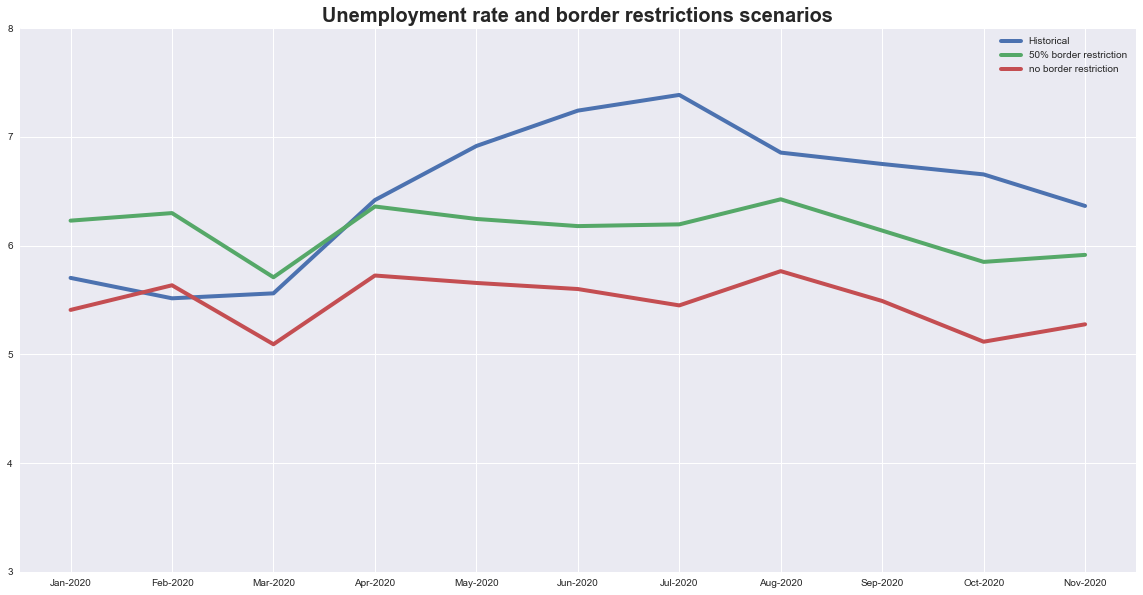

In [20]:
# Plot historical and predicted unemployment rates
fig, ax = plt.subplots(figsize=(20, 10))
plt.title('Unemployment rate and border restrictions scenarios', fontsize=20,weight='bold')
ax.plot(unemployment_rate_model_scen2.loc['Jan-2020':].index,unemployment_rate_model['Unemployment rate Australia'].loc['Jan-2020':], color= 'b',linewidth=4)
ax.plot(unemployment_rate_model_scen2.loc['Jan-2020':].index, unemployment_rate_model_scen1['y^ unemployment 1'].loc['Jan-2020':], color= 'g',linewidth=4)
ax.plot(unemployment_rate_model_scen2.loc['Jan-2020':].index, unemployment_rate_model_scen2['y^ unemployment 2'].loc['Jan-2020':], color= 'r',linewidth=4)
plt.gca().legend(('Historical','Limited border restriction', 'no border restriction'))
plt.ylim(3, 8)
plt.show()

The historical curve is highest compared to the predicated curves, particularly during the height of covid-19 in the May-July period, indicating that strict border restrictions had a severe impact on jobs. The model also indicates that as restrictions are further lifted there is a commensurate improvement on unemployment, given that unemployment levels reduce as restrictions are reduced. The predicted curves also suggests that a rise in unemployment during the peak of covid-19 could have been prevented as predicted levels of unemployment over this period remained flat.   